## 29th oct live class with sunny (winequality)

In [176]:
#Import useful libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## read the data 

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [10]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


## EDA part of winequality data

In [14]:
list(data.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [21]:
print(data.info())
print()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides       

In [19]:
print(data['quality'].value_counts())
print()
print(data['quality'].unique())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

[5 6 7 4 8 3]


In [37]:
round(data.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.320,1.741,4.600,7.100,7.900,9.200,15.900
volatile acidity,1599.0,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric acid,1599.0,0.271,0.195,0.000,0.090,0.260,0.420,1.000
residual sugar,1599.0,2.539,1.410,0.900,1.900,2.200,2.600,15.500
chlorides,1599.0,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1599.0,15.875,10.460,1.000,7.000,14.000,21.000,72.000
total sulfur dioxide,1599.0,46.468,32.895,6.000,22.000,38.000,62.000,289.000
density,1599.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1599.0,3.311,0.154,2.740,3.210,3.310,3.400,4.010
sulphates,1599.0,0.658,0.170,0.330,0.550,0.620,0.730,2.000


## spliting data into x and y (dependent and independent variables)

In [79]:
# split the data in x and y variabe first
x = data.iloc[:,:11]
y = data.iloc[:,-1]
print()

## devide data into dependent and independent variables

In [41]:
#import train test spilit from skitlearn
from sklearn.model_selection import train_test_split

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=0.33)
print()

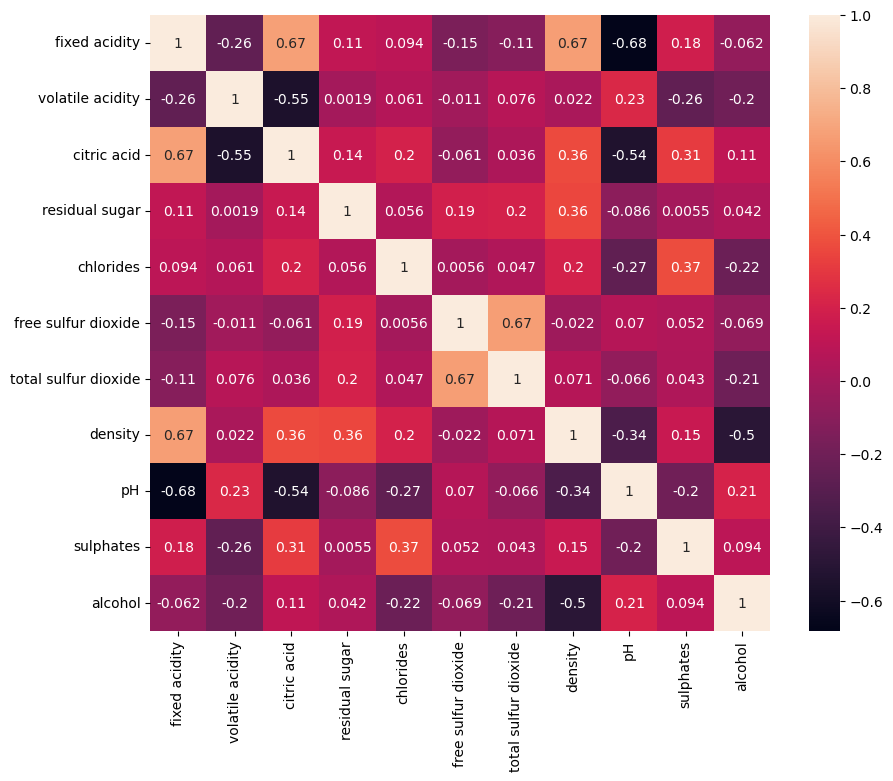

In [179]:
# Checking correlation between variables
plt.figure(figsize = (10,8))
sns.heatmap(x.corr(), annot=True)
plt.show()

## Perfoming standard scaler

In [102]:
# import standard scaler from skitlearn
from sklearn.preprocessing import StandardScaler

#create object this class
scaler = StandardScaler()

In [103]:
xtrain_scaler = scaler.fit(xtrain)
print(xtrain_scaler.mean_)

[ 8.30345472  0.53246499  0.26933707  2.54691877  0.08772736 15.91223156
 46.76330532  0.99677933  3.31453782  0.65881419 10.41521942]


In [108]:
np.mean(xtrain)

fixed acidity            8.303455
volatile acidity         0.532465
citric acid              0.269337
residual sugar           2.546919
chlorides                0.087727
free sulfur dioxide     15.912232
total sulfur dioxide    46.763305
density                  0.996779
pH                       3.314538
sulphates                0.658814
alcohol                 10.415219
dtype: float64

In [142]:
xtrain_transfrom = scaler.fit_transform(xtrain)
xtest_transform = scaler.fit_transform(xtest)

####  We are come so far now time to bulid the model
## We are using SVM model for this data

In [154]:
# import SVC( support vector classifier) from skitlearn Support vector machine 
from sklearn.svm import SVC
model = SVC()

In [155]:
model.fit(xtrain_transfrom, ytrain)

SVC()

In [166]:
#Let's check model score
print('Model Score:',model.score(xtrain_transfrom, ytrain))

Model Score: 0.6778711484593838


In [157]:
ypredict = model.predict(xtest_transform)
print(ypredict)
print()
print(ytest)

[5 5 6 5 6 5 5 5 6 6 6 5 6 5 5 6 5 5 7 5 5 5 6 6 5 5 6 5 5 6 5 5 6 5 6 5 6
 6 5 6 5 5 6 5 6 6 6 5 5 6 5 5 6 7 5 5 6 5 6 5 6 6 5 5 6 5 6 5 6 5 6 5 6 6
 6 5 7 5 6 7 5 7 5 5 6 6 5 6 6 5 6 5 5 6 5 5 5 6 5 5 5 5 6 6 6 6 6 5 5 5 6
 5 6 5 6 6 6 5 5 6 6 6 6 5 5 5 6 5 5 6 6 5 5 6 6 5 5 5 5 6 6 6 6 5 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 7 6 6 5 5 5 5 6 5 7 5
 6 5 6 7 5 6 6 5 6 6 5 5 5 6 6 5 5 5 5 7 6 5 5 6 6 7 5 6 6 6 6 6 5 6 5 5 6
 6 6 5 5 5 7 5 5 5 5 6 6 5 6 5 6 6 5 5 5 6 6 5 6 6 5 6 5 6 5 5 5 5 5 5 6 6
 6 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 6 5 5 6
 5 6 6 7 5 5 6 5 5 5 6 6 6 7 5 5 6 5 5 6 5 5 6 5 6 5 6 5 5 5 6 5 5 6 6 7 5
 5 6 6 6 6 5 5 6 7 5 5 6 5 6 5 6 6 6 6 5 5 6 6 5 5 5 5 5 5 5 6 5 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 6 5 6 6 6 5 5 6 5 5 5 5 6 6 7 6 5 6 5 5 6 5 5 6 7
 6 5 5 6 6 6 6 6 6 5 7 5 6 6 5 5 5 6 6 5 5 6 5 7 5 5 5 6 5 5 5 5 6 5 6 6 5
 5 5 5 6 6 5 6 6 5 5 5 6 7 6 6 5 5 5 5 5 6 5 5 5 5 6 7 6 6 6 5 6 6 6 6 5 6
 6 6 6 5 6 6 6 5 5 6 6 5 

## Checking performance score using matrics function

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [159]:
accuracy_score(ytest,ypredict)

0.5871212121212122

## Let's check the same data using Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [162]:
model2.fit(xtrain_transfrom, ytrain)

LogisticRegression()

In [169]:
ypredict2 = model2.predict(xtest_transform)

In [170]:
accuracy_score(ytest, ypredict2)

0.5757575757575758

In [211]:
from sklearn.svm import SVR
model3 = SVR()

In [212]:
model3.fit(xtrain_transfrom, ytrain)

SVR()

In [214]:
ypredict3 = model3.predict(xtest_transform)
ypredict3

array([5.48925027, 5.01907508, 5.58178719, 5.22133586, 5.65955663,
       5.09749732, 4.93131699, 4.80972565, 5.78862759, 5.6877033 ,
       6.16575481, 5.0687256 , 5.62377231, 5.09268632, 5.34575508,
       6.54013545, 5.17658359, 5.43512428, 6.81675769, 4.93807806,
       4.8359918 , 5.23723114, 5.59631181, 6.3484171 , 5.39989869,
       5.72732457, 6.25929145, 5.1706503 , 4.92606772, 6.0492732 ,
       5.14022737, 4.97597377, 5.84455714, 4.82037606, 5.65127537,
       5.00968428, 6.40226904, 5.80659103, 5.34360925, 6.10713555,
       5.34326697, 5.23832884, 6.05763291, 5.08483454, 5.92085997,
       5.92788225, 6.4786042 , 5.48130942, 5.04720706, 5.54134171,
       4.90468995, 5.10443153, 5.75469712, 6.8876689 , 4.96110969,
       5.13163492, 6.18808814, 5.50939102, 5.8086715 , 5.0889935 ,
       5.61859973, 5.94712444, 5.09555606, 5.1169297 , 6.43840881,
       5.04281595, 6.43850592, 5.47043283, 6.54145703, 5.25512847,
       6.06969996, 5.06719209, 5.79248273, 5.66271304, 6.22718

In [215]:
accuracy_score(ytest, ypredict3)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets